# Information

## **Students Information:**


1. student 1
  * Name = Peyman 
  * Last Name = Naseri
  * Student ID = 96100522
2. student 2
  * Name = AliReza 
  * Last Name = Heshmati
  * Student ID = 99206009




## **Project Information:**
* Course = Deep Learning
* colab = https://colab.research.google.com/drive/1h5DPVqUVtXLF13cgVwDvav5cSIDhR8-n#scrollTo=Reco-GNwBnD6
* github =

# setting gpu

In [ ]:
'''
  https://research.google.com/colaboratory/local-runtimes.html
  
  for run code on local gpu:
    run this comand in anaconda prompet:
      1) pip install jupyter_http_over_ws
      2) jupyter serverextension enable --py jupyter_http_over_ws
      3) jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

pip install jupyter_http_over_ws
jupyter serverextension enable --py jupyter_http_over_ws
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

    copy url and paste on colab

'''


import torch
#Check GPU
torch.cuda.get_device_name(0)

'Tesla T4'

# importing

In [ ]:
from torchvision.models import *
from torchvision.utils import *
import os, sys, time, datetime, random
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from IPython.display import display # to display images
import cv2

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import timeit
import imp
import copy
# import os
import scipy.io as sci  # this is the SciPy module that loads mat-files
# import matplotlib.pyplot as plt
from datetime import datetime, date, time


In [ ]:
# import os
# import torch
import torch.nn as nn
import torchvision.models
import collections
import torch.nn.functional as F
import torchvision.transforms as transforms


In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


# Download DATA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# TODO - NYU Depth V2:
# The NYU-Depth V2 data set is comprised of video sequences from a variety of
# indoor scenes as recorded by both the RGB and Depth cameras from the Microsoft
# Kinect. It features:
#   - 1449 densely labeled pairs of aligned RGB and depth images
#   - 464 new scenes taken from 3 cities
#   - 407,024 new unlabeled frames
#   - Each object is labeled with a class and an instance number (cup1, cup2, cup3, etc)
# The dataset has several components:
#   - Labeled: A subset of the video data accompanied by dense multi-class labels.
#            This data has also been preprocessed to fill in missing depth labels.
#   - Raw: The raw RGB, depth, and accelerometer data as provided by the Kinect.
# Toolbox: Useful functions for manipulating the data and labels.

"""

def downloader(link, base_path, file_name, zip=False):  
    path = base_path + file_name
    isdir = os.path.isdir(path[:-4])
    if isdir:
        print(file_name[:-4], "folder already exists! Download skipped...\n")
    else:
        isFile = os.path.isfile(path)
        if isFile:
            print(file_name, "already exists! Download skipped...\n")
        else:
            import requests
            r = requests.get(link, stream = True)
            # 1 MB = 1024 * 1024 byte
            CS = 5000*1024*1024
            with open(path, "wb") as file: 
                print(file_name, "download started.")
                for i, block in enumerate(r.iter_content(chunk_size = CS)):
                    # print(".", end = "")
                    # print((i+1)*chunk_size,"MB downloaded...")
                    file.write(block)
                    # if block:
                print("\n" + file_name, "download finished.")

base_path = "/content/drive/MyDrive/"
nyu_dep_name = "nyu_depth_v2_labeled.mat"
nyu_dep_link = "http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/nyu_depth_v2_labeled.mat"

start= timeit.default_timer()
downloader(nyu_dep_link, base_path, nyu_dep_name)

stop = timeit.default_timer()
print('Time (min): ', (stop - start)/60) 
"""

nyu_depth_v2_labeled.mat download started.

nyu_depth_v2_labeled.mat download finished.
Time (min):  13.578449401816668


In [12]:
base_path = "/content/drive/MyDrive/"
#base_path = "../input/depth-estimation/"
nyu_dep_name = "nyu_depth_v2_labeled.mat"

nyu_dep_path = base_path + nyu_dep_name

import h5py

nyu_dict = h5py.File(nyu_dep_path,'r')

# Object Detection

## install YOLOv5 dependencies

In [13]:
# !pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt  
# !pip install opencv-python
# ! pip install torchsummary

In [20]:
# import torch
# from torchsummary import summary
# Model
ovbject_detector = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
# ovbject_detector.cuda()
# ovbject_detector.eval()
# print(ovbject_detector)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-2-4 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [21]:
print(ovbject_detector)

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

image 1/1: 480x640 1 chair, 1 microwave, 1 oven, 1 refrigerator
Speed: 4.1ms pre-process, 17.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
Saved 1 image to runs/detect/exp3


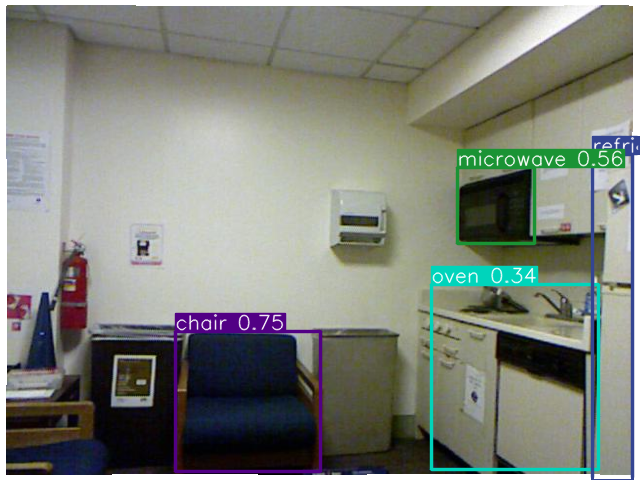

In [23]:
# Images
img = Image.fromarray(nyu_dict['images'][0].transpose((2,1,0)))
imgs = [img]  # batch of images
# Inference
results = ovbject_detector(imgs)

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)
Image.fromarray(results.imgs[0])

image 1/1: 720x1280 2 persons, 1 tie
Speed: 232.2ms pre-process, 12.8ms inference, 1.3ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to runs/detect/exp4


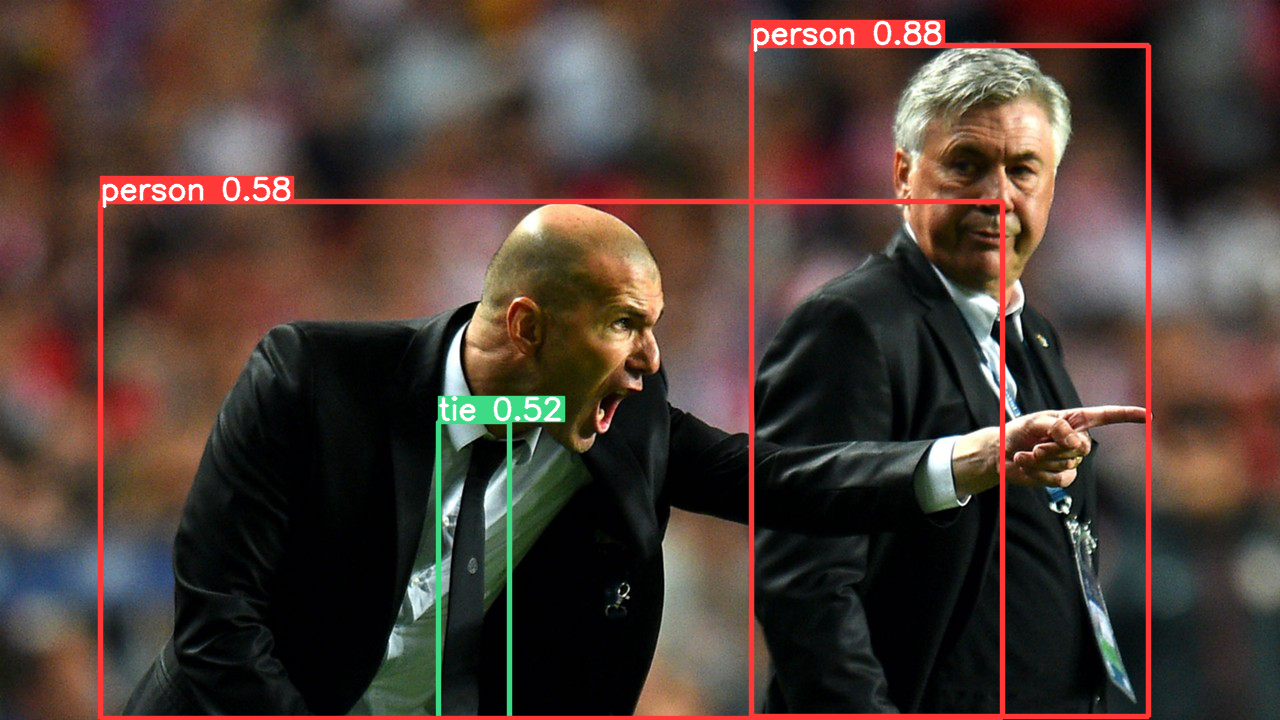

In [24]:
imgs = ['https://ultralytics.com/images/zidane.jpg']  # batch of images

# Inference
results = ovbject_detector(imgs)

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]
display(Image.fromarray(results.imgs[0]))

# Depth estimation

## init network

In [17]:
def weights_init(m):
    # Initialize kernel weights with Gaussian distributions
    if isinstance(m, nn.Conv2d):
        n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
        m.weight.data.normal_(0, math.sqrt(2. / n))
        if m.bias is not None:
            m.bias.data.zero_()
    elif isinstance(m, nn.ConvTranspose2d):
        n = m.kernel_size[0] * m.kernel_size[1] * m.in_channels
        m.weight.data.normal_(0, math.sqrt(2. / n))
        if m.bias is not None:
            m.bias.data.zero_()
    elif isinstance(m, nn.BatchNorm2d):
        m.weight.data.fill_(1)
        m.bias.data.zero_()
        
def conv(in_channels, out_channels, kernel_size):
    padding = (kernel_size-1) // 2
    assert 2*padding == kernel_size-1, "parameters incorrect. kernel={}, padding={}".format(kernel_size, padding)
    return nn.Sequential(
          nn.Conv2d(in_channels,out_channels,kernel_size,stride=1,padding=padding,bias=False),
          nn.BatchNorm2d(out_channels),
          nn.ReLU(inplace=True),
        )

def depthwise(in_channels, kernel_size):
    padding = (kernel_size-1) // 2
    assert 2*padding == kernel_size-1, "parameters incorrect. kernel={}, padding={}".format(kernel_size, padding)
    return nn.Sequential(
          nn.Conv2d(in_channels,in_channels,kernel_size,stride=1,padding=padding,bias=False,groups=in_channels),
          nn.BatchNorm2d(in_channels),
          nn.ReLU(inplace=True),
        )

def pointwise(in_channels, out_channels):
    return nn.Sequential(
          nn.Conv2d(in_channels,out_channels,1,1,0,bias=False),
          nn.BatchNorm2d(out_channels),
          nn.ReLU(inplace=True),
        )



In [18]:
class MobileNet(nn.Module):
    def __init__(self, relu6=True):
        super(MobileNet, self).__init__()

        def relu(relu6):
            if relu6:
                return nn.ReLU6(inplace=True)
            else:
                return nn.ReLU(inplace=True)

        def conv_bn(inp, oup, stride, relu6):
            return nn.Sequential(
                nn.Conv2d(inp, oup, 3, stride, 1, bias=False),
                nn.BatchNorm2d(oup),
                relu(relu6),
            )

        def conv_dw(inp, oup, stride, relu6):
            return nn.Sequential(
                nn.Conv2d(inp, inp, 3, stride, 1, groups=inp, bias=False),
                nn.BatchNorm2d(inp),
                relu(relu6),
    
                nn.Conv2d(inp, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
                relu(relu6),
            )

        self.model = nn.Sequential(
            conv_bn(  3,  32, 2, relu6), 
            conv_dw( 32,  64, 1, relu6),
            conv_dw( 64, 128, 2, relu6),
            conv_dw(128, 128, 1, relu6),
            conv_dw(128, 256, 2, relu6),
            conv_dw(256, 256, 1, relu6),
            conv_dw(256, 512, 2, relu6),
            conv_dw(512, 512, 1, relu6),
            conv_dw(512, 512, 1, relu6),
            conv_dw(512, 512, 1, relu6),
            conv_dw(512, 512, 1, relu6),
            conv_dw(512, 512, 1, relu6),
            conv_dw(512, 1024, 2, relu6),
            conv_dw(1024, 1024, 1, relu6),
            nn.AvgPool2d(7),
        )
        self.fc = nn.Linear(1024, 1000)

    def forward(self, x):
        x = self.model(x)
        x = x.view(-1, 1024)
        x = self.fc(x)
        return x


In [19]:
class Depth_Estimator(nn.Module):
    def __init__(self):
        super(Depth_Estimator, self).__init__()
        mobilenet = MobileNet()
        # pretrained
        pretrained_path = 'mobilenet_model.pth.tar'
        checkpoint = torch.load(pretrained_path)
        state_dict = checkpoint['state_dict']

        from collections import OrderedDict
        new_state_dict = OrderedDict()
        for k, v in state_dict.items():
            name = k[7:] # remove `module.`
            new_state_dict[name] = v
        mobilenet.load_state_dict(new_state_dict)


        for i in range(14):
            setattr( self, 'conv{}'.format(i), mobilenet.model[i])

        # NNconv5
        kernel_size = 5
        self.decode_conv1 = nn.Sequential(
            depthwise(1024, kernel_size),
            pointwise(1024, 512))
        self.decode_conv2 = nn.Sequential(
            depthwise(512, kernel_size),
            pointwise(512, 256))
        self.decode_conv3 = nn.Sequential(
            depthwise(256, kernel_size),
            pointwise(256, 128))
        self.decode_conv4 = nn.Sequential(
            depthwise(128, kernel_size),
            pointwise(128, 64))
        self.decode_conv5 = nn.Sequential(
            depthwise(64, kernel_size),
            pointwise(64, 32))
        self.decode_conv6 = pointwise(32, 1)
        weights_init(self.decode_conv1)
        weights_init(self.decode_conv2)
        weights_init(self.decode_conv3)
        weights_init(self.decode_conv4)
        weights_init(self.decode_conv5)
        weights_init(self.decode_conv6)

    def forward(self, x):
        # encoder and preparing skip connections
        for i in range(14):
            layer = getattr(self, 'conv{}'.format(i))
            x = layer(x)
            # print("{}: {}".format(i, x.size()))
            if i==1:
                x1 = x
            elif i==3:
                x2 = x
            elif i==5:
                x3 = x
                
        # decoder with NNconv5 and additive skip connections
        for i in range(1,6):
            layer = getattr(self, 'decode_conv{}'.format(i))
            x = layer(x)
            x = F.interpolate(x, scale_factor=2, mode='nearest')
            if i==4:
                x = x + x1
            elif i==3:
                x = x + x2
            elif i==2:
                x = x + x3
            # print("{}: {}".format(i, x.size()))
        x = self.decode_conv6(x)
        return x

#print('\n','num parameters:', sum(p.numel() for p in Depth_Estimator().parameters() if p.requires_grad))


## training

In [ ]:
len_index = len(nyu_dict['depths'])
list_index = np.arange(len(nyu_dict['depths']))
np.random.seed(20)
np.random.shuffle(list_index)

torch.manual_seed(20)

class preparing_data(torch.utils.data.Dataset):
    def __init__(self, subset: str , index = list_index ,root = 'nyu-depth-v2/nyu_data' ):
        
        self.root = root
        self.transform_test = transforms.Compose([transforms.CenterCrop(336), transforms.Resize(224)])
        self.subset = subset  

        
        len_ = len(index)
        
        
        if subset == "train":
            self.index = index[:int(len_ * 0.8)]
                
        elif subset == "validation":
            self.index = index[int(len_ * 0.8):int(len_ * 0.95)]
            
        elif subset == "test":
            self.index = index[int(len_ * 0.95):]
                
        else :
            raise ValueError(f"Unknown subset {subset}. Use validation/testing/training")
    
    def train_transform(self, data_, depth_):
        angle = np.random.uniform(-5.0, 5.0) # random rotation degrees
        do_flip = np.random.uniform(0.0, 1.0) < 0.5 # random horizontal flip
        
        # rotation:
        data_ = transforms.functional.rotate(data_,angle)
        depth_ = transforms.functional.rotate(depth_,angle)
        # CenterCrop:
        data_ = transforms.CenterCrop(336)(data_)
        depth_ = transforms.CenterCrop(336)(depth_)
        # horizontal flip:
        if do_flip :
            data_ = transforms.functional.hflip(data_)
            depth_ = transforms.functional.hflip(depth_)
        
        # resize to 224,224
        data_ = transforms.Resize(224)(data_)
        depth_ = transforms.Resize(224)(depth_)
        # ColorJitter just for rgb:
        data_ = transforms.ColorJitter(0.3, 0.3, 0.3)(data_)
        # normalize
        data_ = transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])(data_ )
        return  data_ , depth_
    
    def test_transform(self, data_, label_):
        # perform 1st step of data augmentation
        data_ = self.transform_test(data_)
        data_ = transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])(data_ )
        return  data_ , self.transform_test(label_)

    def __len__(self):
        return len(self.index)
    
    def __getitem__(self,n):
        data = torch.tensor((nyu_dict['images'][self.index[n]].transpose((0,2,1)))/255,dtype = torch.float32)
        label = torch.tensor((nyu_dict['depths'][self.index[n]].transpose((1, 0))),dtype = torch.float32)[None, :]
        if self.subset == 'train' :
            data, label  = self.train_transform(data, label)
        else :
            data, label  = self.test_transform(data, label)

        return data, label

In [ ]:
def loss_validation(net, data_loader, device):
    net.eval()
    los = 0
    k = 0
    for batch_idx, (data, target) in enumerate(data_loader):
        data = data.to(device)
        target = target.to(device)
        output = net(data)
        k += 1
        #los +=nn.MSELoss()(output, target)
        los += nn.L1Loss()(output, target)
    return np.round(los.cpu().detach().numpy() / k , 4) 

def train_epoch(model, optimizer, train_loader, device):
    model.train()
    losses = 0
    k = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        k += 1
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        #loss =nn.MSELoss()(output, target)
        loss = nn.L1Loss()(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses += loss

    print(f"Train Loss: {losses.item() / k:.4f}")

    return losses / k

def run(model, train_loader, validation_loader,  optimizer, scheduler, device, checkpoint_file, n_epoch=10):
    best_score = 100000
    best_model = copy.deepcopy(model)
    
    train_loss = []
    val_loss = []
    
    for epoch in range(n_epoch):
        print('\n',f"--- start epoch {epoch+1} ---")
        train_loss.append(train_epoch(model, optimizer, train_loader, device))
        if scheduler:
            scheduler.step()
        val_loss.append(loss_validation(model, validation_loader, device))
        print(f"Validation_loss: {val_loss[-1]:.5f}")
        if best_score > val_loss[-1]:
            best_score =  val_loss[-1]
            best_model = copy.deepcopy(model)
            torch.save(best_model.state_dict(), checkpoint_file)
    print('\n','************','\n',f"best validation_loss: {best_score:.5f}")
    
    return torch.stack(train_loss).cpu().detach().numpy(), val_loss, best_model


In [ ]:
# norm 1 and loss norm 1
checkpoint_file = "best_model"
batch_size = 8 # 8
epoch = 40 

optimizer = 'sgd' # or adam

# train

if os.path.exists(checkpoint_file):
    raise FileExistsError(f"{checkpoint_file} already exists")

if device == "cuda":
    num_workers = 1
    pin_memory = True
else:
    num_workers = 0
    pin_memory = False

print(f"Device: {device}")

model = Depth_Estimator().to(device)

train_loader = torch.utils.data.DataLoader(
    preparing_data(subset="train"),
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)
validation_loader = torch.utils.data.DataLoader(
    preparing_data(subset="validation"),
    batch_size=2,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers,
    pin_memory=pin_memory
)


if optimizer == "adam":
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0001)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
elif optimizer == "sgd":
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.2)
else:
    raise ValueError(f"Unknown optimizer {optimizer}, use adam/sgd")
    
start = timeit.default_timer()
train_loss, val_loss, best_model = run(model,train_loader,validation_loader,
                                      optimizer,scheduler,device,checkpoint_file,n_epoch=epoch)


print('\n','total Time (min) : ', round((timeit.default_timer()-start)/60, 3))

FileExistsError: ignored

In [ ]:
if os.path.exists(checkpoint_file):
    checkpoint_file = "best_model"


    best_model = Depth_Estimator().to(device)
    best_model.load_state_dict(torch.load(checkpoint_file))

## evaluition

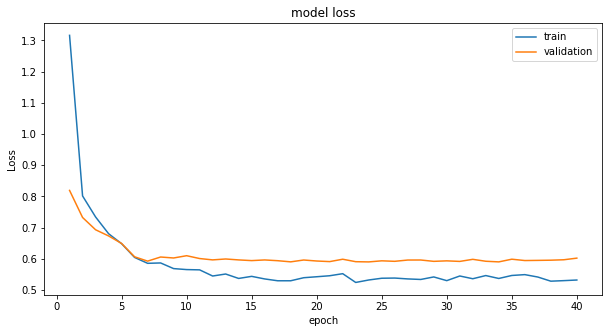

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(range(1,len(train_loss)+1),train_loss)
plt.plot(range(1,len(val_loss)+1),val_loss)
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
def delta_i (targets, preds,i):
    n1 = targets / (preds+0.00001)
    n2 = preds / (targets+0.00001)
    ind = np.maximum(n1,n2) <= (1.25)**i
    succes_ = len(n2[ind])
    all_ = len(n2.flatten())
    return np.round(succes_/all_,3)
    
def rmse(targets, preds):
    return np.sqrt(np.mean((targets-preds)**2))

val_data = preparing_data(subset="validation")

predicteds = []
originals_target = []
for i in range(int(len_index * 0.95)-int(len_index * 0.8)):
    val = val_data[i]
    predicteds.append(best_model((val[0])[None,:].to(device)).cpu().detach().numpy())
    originals_target.append((val[1])[None,:].cpu().detach().numpy())
    
predicteds, originals_target = np.array(predicteds) , np.array(originals_target)

print('RMSE of best model :', rmse(originals_target, predicteds),'   delta_1 :', delta_i(originals_target, predicteds,1)
     ,'   delta_2 :', delta_i(originals_target, predicteds,2),'   delta_3 :', delta_i(originals_target, predicteds,3))

RMSE of best model : 1.3915033    delta_1 : 0.398    delta_2 : 0.689    delta_3 : 0.857


### testing

In [ ]:
i = 0
or_ind = list_index[i+int(len_index*0.8)]

test_data = preparing_data(subset="validation")

test = test_data[i]

output = best_model((test[0])[None,:].to(device))

plt.figure(figsize = (10,10))
plt.title('oeiginal image')
plt.imshow(nyu_dict['images'][or_ind].transpose((2,1,0)))

plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('oeiginal depths')
plt.imshow(nyu_dict['depths'][or_ind].transpose((1,0)),cmap = 'gray')
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('prepared image for network')
plt.imshow(test[0].cpu().numpy().transpose((1,2,0)))
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('oeiginal prepared depths for network')
plt.imshow(test[1].cpu().numpy().squeeze(),cmap = 'gray')
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('predicted depth')
plt.imshow(output.cpu().detach().numpy().squeeze(),cmap = 'gray')
plt.axis('off')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

In [ ]:
i = 1
or_ind = list_index[i+int(len_index*0.8)]

test_data = preparing_data(subset="validation")

test = test_data[i]

output = best_model((test[0])[None,:].to(device))

plt.figure(figsize = (10,10))
plt.title('oeiginal image')
plt.imshow(nyu_dict['images'][or_ind].transpose((2,1,0)))
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('oeiginal depths')
plt.imshow(nyu_dict['depths'][or_ind].transpose((1,0)),cmap = 'gray')
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('prepared image for network')
plt.imshow(test[0].cpu().numpy().transpose((1,2,0)))
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('oeiginal prepared depths for network')
plt.imshow(test[1].cpu().numpy().squeeze(),cmap = 'gray')
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('predicted depth')
plt.imshow(output.cpu().detach().numpy().squeeze(),cmap = 'gray')
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

(-0.5, 223.5, 223.5, -0.5)

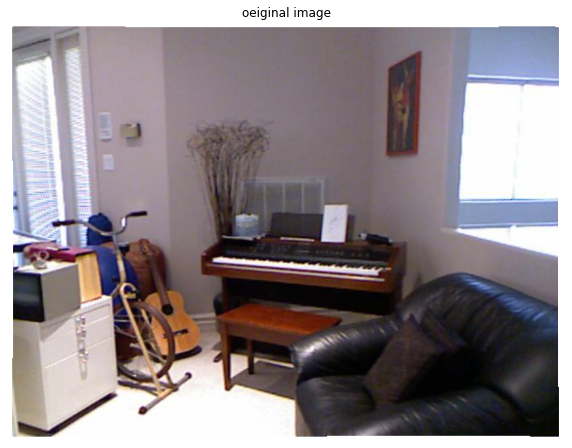

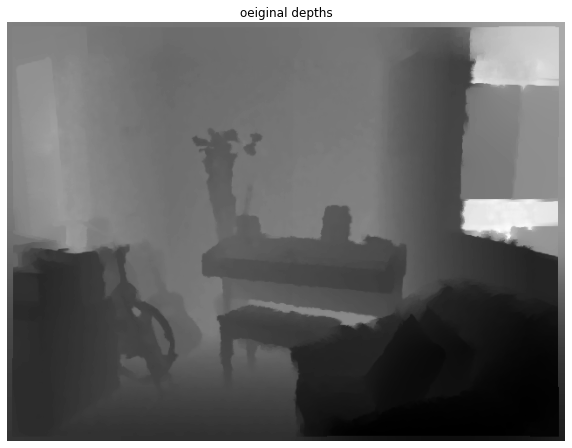

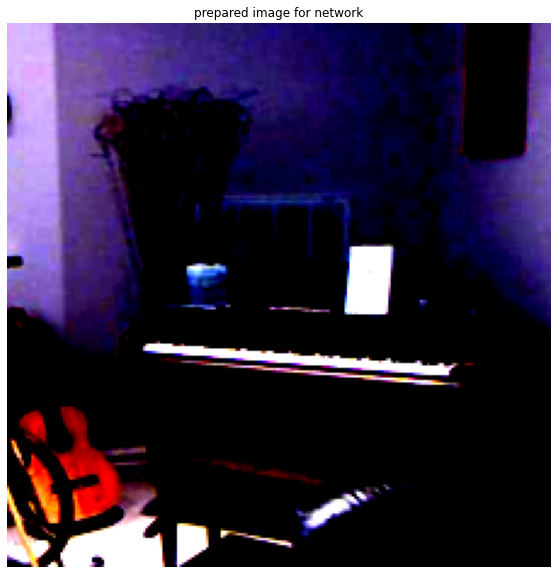

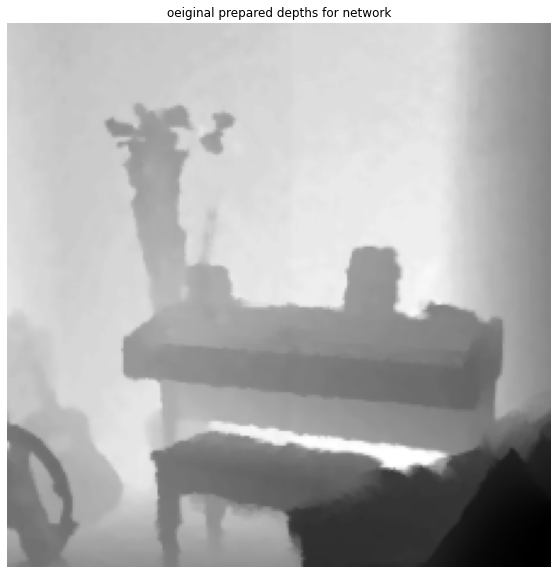

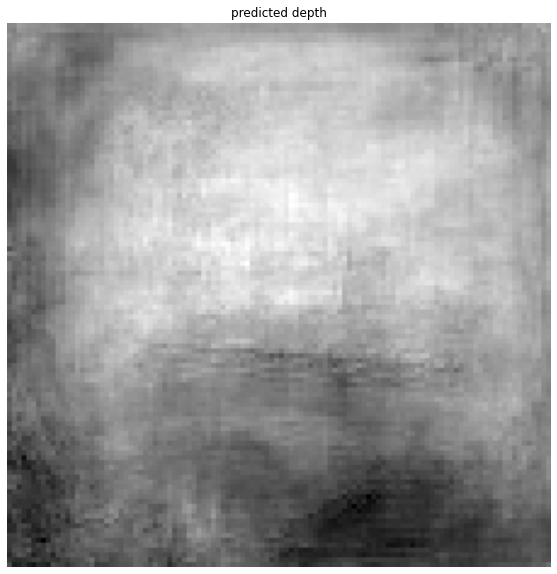

In [ ]:
i = 2
or_ind = list_index[i+int(len_index*0.8)]

test_data = preparing_data(subset="validation")

test = test_data[i]

output = best_model((test[0])[None,:].to(device))

plt.figure(figsize = (10,10))
plt.title('oeiginal image')
plt.imshow(nyu_dict['images'][or_ind].transpose((2,1,0)))
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('oeiginal depths')
plt.imshow(nyu_dict['depths'][or_ind].transpose((1,0)),cmap = 'gray')
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('prepared image for network')
plt.imshow(test[0].cpu().numpy().transpose((1,2,0)))
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('oeiginal prepared depths for network')
plt.imshow(test[1].cpu().numpy().squeeze(),cmap = 'gray')
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('predicted depth')
plt.imshow(output.cpu().detach().numpy().squeeze(),cmap = 'gray')
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

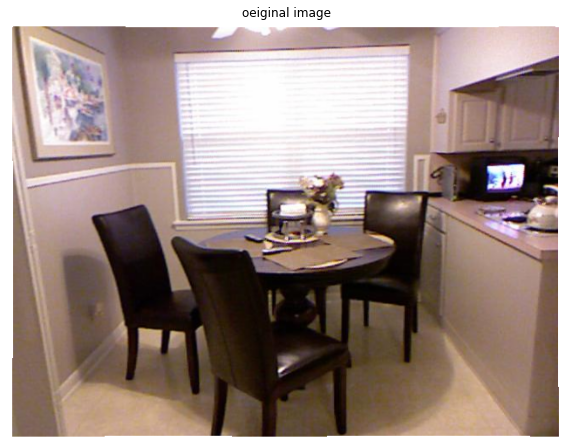

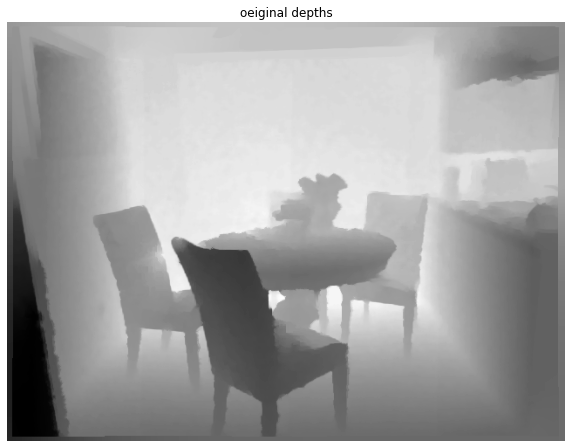

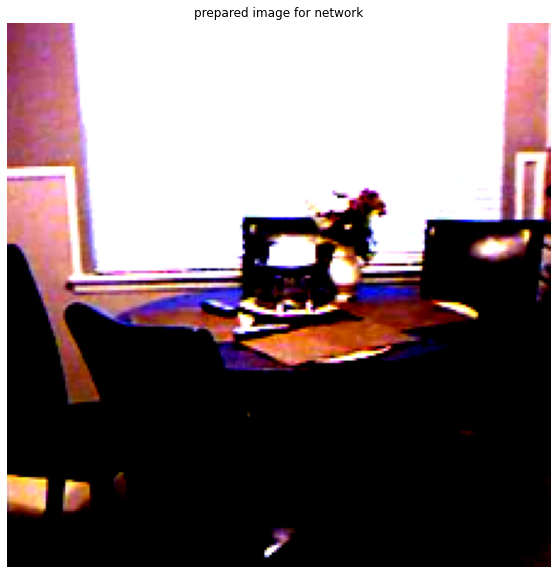

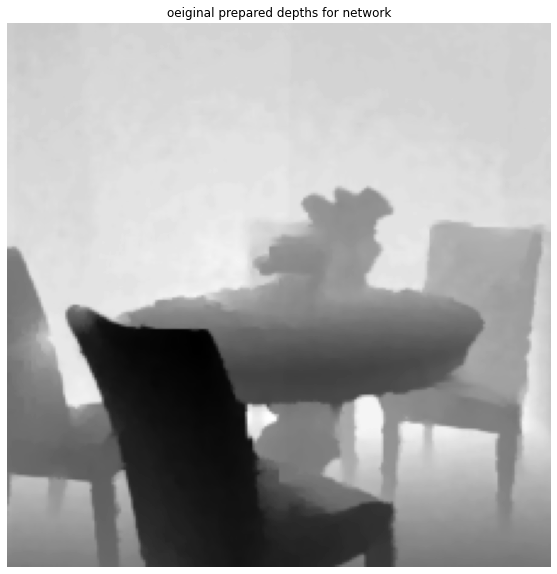

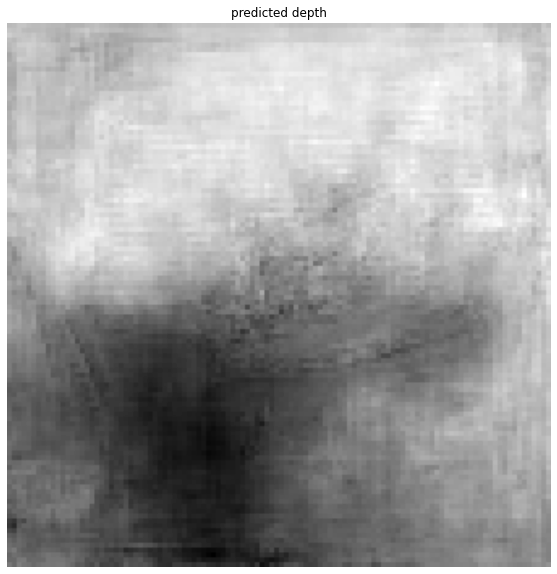

In [ ]:
i = 3
or_ind = list_index[i+int(len_index*0.8)]

test_data = preparing_data(subset="validation")

test = test_data[i]

output = best_model((test[0])[None,:].to(device))

plt.figure(figsize = (10,10))
plt.title('oeiginal image')
plt.imshow(nyu_dict['images'][or_ind].transpose((2,1,0)))
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('oeiginal depths')
plt.imshow(nyu_dict['depths'][or_ind].transpose((1,0)),cmap = 'gray')
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('prepared image for network')
plt.imshow(test[0].cpu().numpy().transpose((1,2,0)))
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('oeiginal prepared depths for network')
plt.imshow(test[1].cpu().numpy().squeeze(),cmap = 'gray')
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('predicted depth')
plt.imshow(output.cpu().detach().numpy().squeeze(),cmap = 'gray')
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

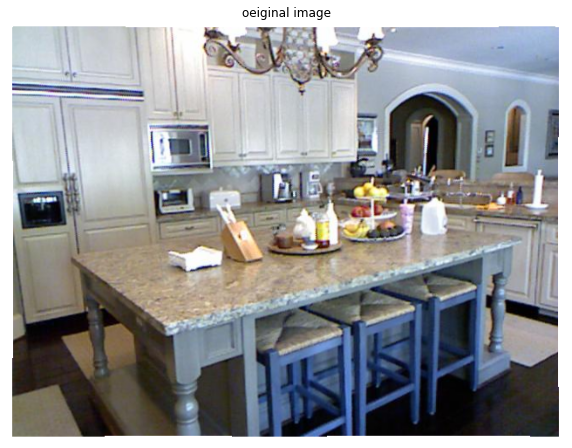

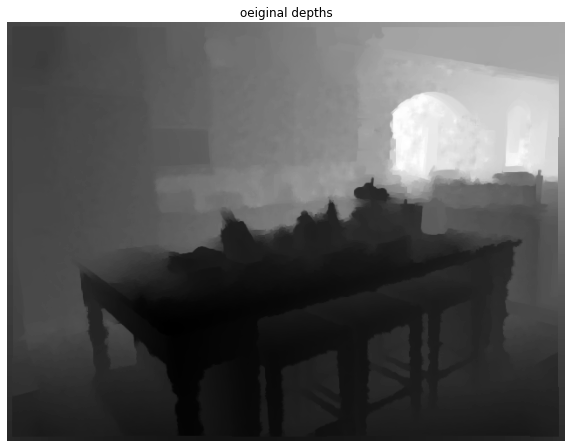

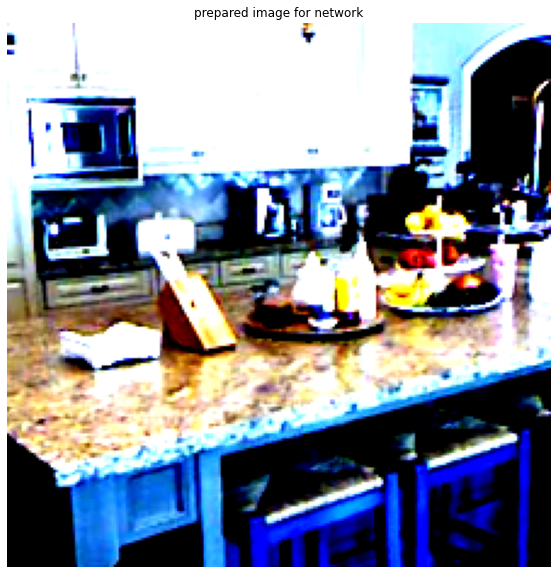

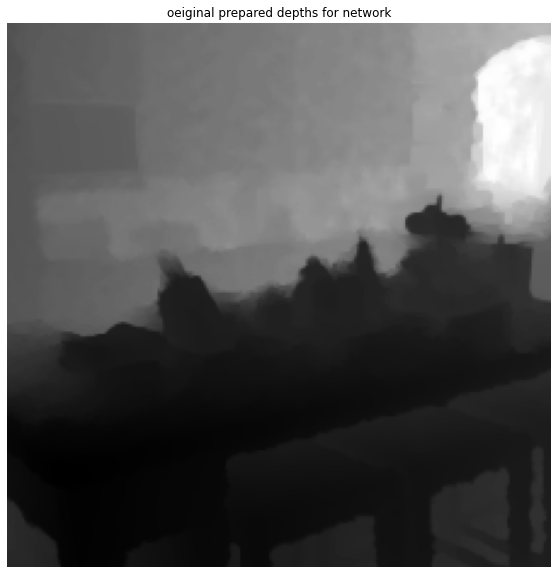

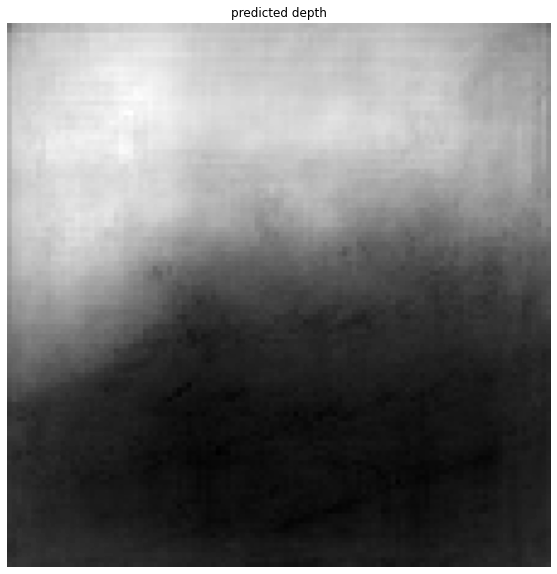

In [ ]:
i = 4
or_ind = list_index[i+int(len_index*0.8)]

test_data = preparing_data(subset="validation")

test = test_data[i]

output = best_model((test[0])[None,:].to(device))

plt.figure(figsize = (10,10))
plt.title('oeiginal image')
plt.imshow(nyu_dict['images'][or_ind].transpose((2,1,0)))
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('oeiginal depths')
plt.imshow(nyu_dict['depths'][or_ind].transpose((1,0)),cmap = 'gray')
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('prepared image for network')
plt.imshow(test[0].cpu().numpy().transpose((1,2,0)))
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('oeiginal prepared depths for network')
plt.imshow(test[1].cpu().numpy().squeeze(),cmap = 'gray')
plt.axis('off')

plt.figure(figsize = (10,10))
plt.title('predicted depth')
plt.imshow(output.cpu().detach().numpy().squeeze(),cmap = 'gray')
plt.axis('off')

# conecting 2 net

## depth_estimation

In [ ]:
from scipy import ndimage

def prep_data(data):
    data = torch.tensor((data.transpose((0,2,1)))/255,dtype = torch.float32)

    p=transforms.Compose([
        transforms.ToPILImage(),
        #transforms.Resize(325), # must remove
        #transforms.CenterCrop(224), # must remove
        transforms.Resize(224)
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    return p(data)

def depth_estimation(img):
    x = prep_data(img)
    output = best_model((x)[None,:].to(device))
    output = output.reshape(224,224)
    result = ndimage.generic_filter(output.cpu().detach().numpy(), np.nanmean, size=(5,5), mode='constant', cval=np.NaN) # filter 5*5
    print(result.shape)
    return result

In [ ]:
def detection(img):
    depths = depth_estimation(img)
    img = Image.fromarray(img.transpose((2,1,0)))
    
    display(img)
    
    imgs = [img]  # batch of images
    # Inference

    results = model(imgs)
    results.print()
    results.save()  # or .show()

    results.xyxy[0]  # img1 predictions (tensor)
    results.pandas().xyxy[0]  # img1 predictions (pandas)
    display(Image.fromarray(results.imgs[0]))
    
    df = results.pandas().xyxy[0]
    w = img.size[0]
    h = img.size[1]
    # back to currect size
    df['xmin'] = df['xmin'] * 224/w
    df['ymin'] = df['ymin'] * 224/h
    df['xmax'] = df['xmax'] * 224/w
    df['ymax'] = df['ymax'] * 224/h
    
    df['xcenter'] = (df['xmin'] + df['xmax'])/2
    df['ycenter'] = (df['ymin'] + df['ymax'])/2 
    
    df['xcenter'] = df['xcenter'].astype(int)
    df['ycenter'] = df['ycenter'].astype(int)
    df['depth_center'] = df.apply(lambda x: depths[x['xcenter']][x['ycenter']], axis=1)

    return df

(224, 224)


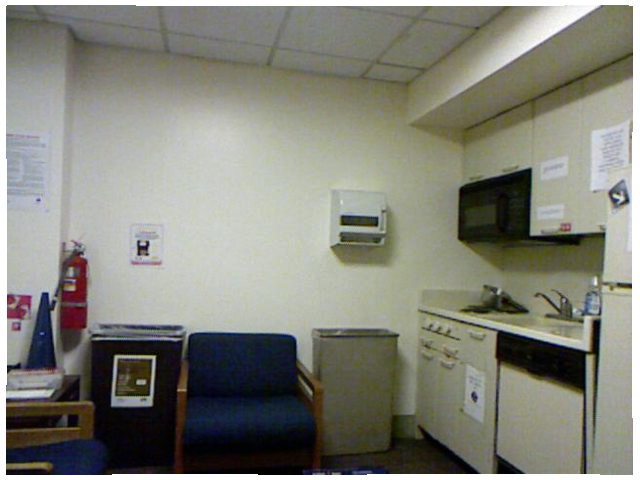

image 1/1: 480x640 1 chair, 1 microwave, 1 oven, 1 refrigerator
Speed: 2.0ms pre-process, 14.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
Saved 1 image to runs\detect\exp69


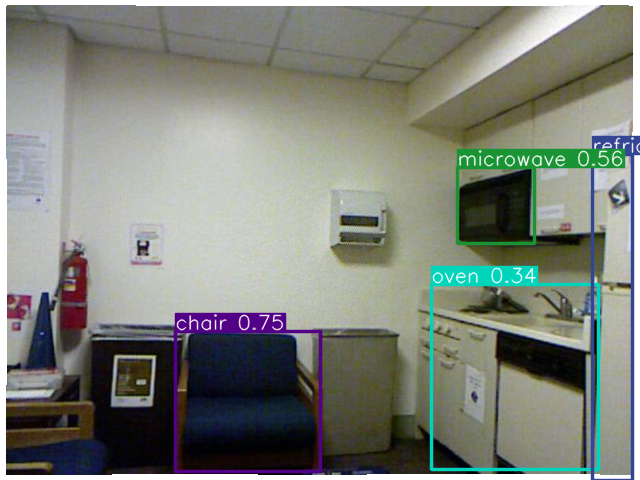

xmin        ymin        xmax        ymax  confidence  class  \
0   61.451393  154.579331  112.233607  219.944651    0.754996     56   
1  160.007208   78.261316  187.241904  113.649982    0.560736     68   
2  207.358188   72.264703  221.430606  224.000000    0.488917     72   
3  151.186723  132.954883  209.570233  219.097921    0.341652     69   

           name  xcenter  ycenter  depth_center  
0         chair       86      187      4.612418  
1     microwave      173       95      3.257051  
2  refrigerator      214      148      1.959894  
3          oven      180      176      1.466213

In [ ]:
img = nyu_dict['images'][0]
detection(img)